In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
main_df = pd.read_csv('https://breathecode.herokuapp.com/asset/internal-link?id=2545&path=sales.csv')

In [3]:
main_df.head()

,date,sales
0,2022-09-03 17:10:08.079328,55.292157
1,2022-09-04 17:10:08.079328,53.803211
2,2022-09-05 17:10:08.079328,58.141693
3,2022-09-06 17:10:08.079328,64.530899
4,2022-09-07 17:10:08.079328,66.013633


In [4]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    366 non-null    object 
 1   sales   366 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


In [5]:
main_df['date'] = pd.to_datetime(main_df['date'])

In [6]:
main_df.isna().sum()

date     0
sales    0
dtype: int64

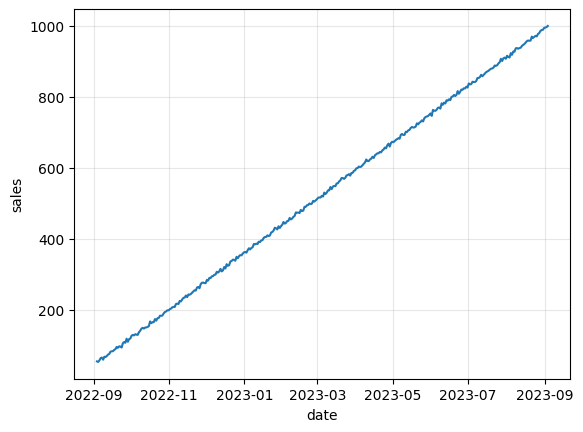

In [7]:
sns.lineplot(data=main_df,x='date',y='sales')
plt.grid(alpha=0.3)

<Axes: xlabel='sales', ylabel='Count'>

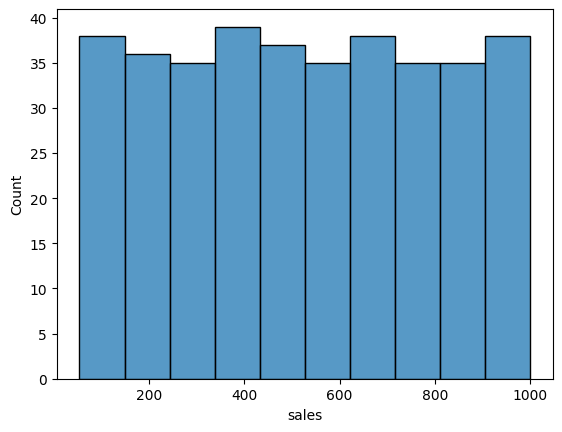

In [8]:
sns.histplot(data=main_df,x='sales')

In [9]:
temp_df = main_df.groupby('date').mean()

In [10]:
temp_df

,sales
date,
2022-09-03 17:10:08.079328,55.292157
2022-09-04 17:10:08.079328,53.803211
2022-09-05 17:10:08.079328,58.141693
2022-09-06 17:10:08.079328,64.530899
2022-09-07 17:10:08.079328,66.013633
...,...
2023-08-30 17:10:08.079328,989.600354
2023-08-31 17:10:08.079328,994.987326
2023-09-01 17:10:08.079328,995.814415


<Axes: xlabel='date', ylabel='sales'>

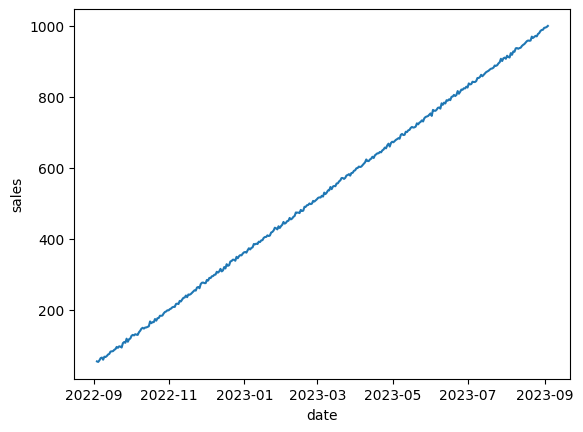

In [11]:
sns.lineplot(data=temp_df,x='date',y='sales')